<a href="https://colab.research.google.com/github/TheTonyZhou/JSC270-A4/blob/main/Assignment_4_Part_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [142]:
api_key = 'k4yPuNFiTgwROrOSCD3Bdm7zq'

api_secret_key = 'fVFXJOEq7Cnlya6NY0gQVkqAnkAnfW0PqIDoBocqZQ5cO78cMc'

access_key =  '1507138918461976578-6VO5QanRTqtLp3CWoImY6FM7oV5Yjq'

access_secret = 'Eh4nw2AAaDt3MXtDNyv5PV4CElTjchsgBiDOIvwzfI75b'

bearer_token = 'AAAAAAAAAAAAAAAAAAAAAMXxagEAAAAAPSJckY7rlydPs0Y1O%2FVGSxlV0P0%3DuYoSAAPRVMNTXUVbXgp5VSsiqvS44jJ1Or8dg9d3IOCMQEXtvM'

In [143]:
import csv
import pandas as pd
import seaborn as sns
import re
import nltk
from nltk.stem.porter import *
from nltk.corpus import stopwords
import numpy as np

In [144]:
import tweepy as tw

# Use credentials to authorize access
auth = tw.auth.OAuthHandler(api_key, api_secret_key)
auth.set_access_token(access_key, access_secret)

# essential v2
# auth = tw.Client(bearer_token, api_key, api_secret_key, access_key, access_secret)

api = tw.API(auth, wait_on_rate_limit=True)

In [145]:
# search_words = 'Amber Alert'
# date_since = "2022-03-26"
# date_until = "2022-03-27"

# # Filter out duplicate search words
# search_with_filter = search_words + " -filter:retweets"

# tweets = tw.Cursor(api.search,
#               q=search_with_filter,
#               lang="en",
#               since=date_since,
#               until=date_until,
#               tweet_mode='extended'
#               ).items(2000)

# # Open/create a file to append data to
# csvFile = open('result_not_hashtag_20220326_full.csv', 'w')

# #Use csv writer
# csvWriter = csv.writer(csvFile)
# csvWriter.writerow(['datetime', 'tweet'])
# for tweet in tweets:
#   # Write a row to the CSV file. I use encode UTF-8
#   if 'retweeted_status' in tweet._json:
#       msg = tweet._json['retweeted_status']['full_text']
#   else:
#       msg = tweet.full_text
#   # print(msg)
#   csvWriter.writerow([tweet.created_at, msg])
# csvFile.close()

In [146]:
# DEPRECIATED

# Open/create a file to append data to
# csvFile = open('result_not_hashtag.csv', 'a')

# #Use csv writer
# csvWriter = csv.writer(csvFile)

# for tweet in tweets:
#   # Write a row to the CSV file. I use encode UTF-8
#     csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8')])
# csvFile.close()

In [147]:
# # Open/create a file to append data to
# csvFile = open('result2.csv', 'a')

# #Use csv writer
# csvWriter = csv.writer(csvFile)

In [148]:
# # The result is an iterable
# for tweet in tweets:
#   # Write a row to the CSV file. I use encode UTF-8
#     csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8')])

In [149]:
# csvFile.close()

In [150]:
from google.colab import files
# files.upload()

In [151]:
labelled_data = open('labelled_data.csv', 'r')
csvReader = csv.reader(labelled_data)

rows = []
for row in csvReader:
  rows.append(row)


In [172]:
train_data = pd.read_csv('labelled_data.csv')

## Data Inspection

In [153]:
train_data.head()

,datetime,full_tweet,sentiment
0,25/3/2022 23:54,The Tennessee Bureau of Investigation has issu...,1
1,25/3/2022 23:54,The Tennessee Bureau of Investigation has issu...,1
2,25/3/2022 23:54,The Tennessee Bureau of Investigation has issu...,1
3,25/3/2022 23:54,The Tennessee Bureau of Investigation has issu...,1
4,25/3/2022 23:54,The Tennessee Bureau of Investigation has issu...,1


In [154]:
# Data inspection
print('Shape of training data: ' + str(train_data.shape))
print('Sentiment counts: (0 is negative, 1 is neutral, 2 is positive)')
train_data.sentiment.value_counts()

Shape of training data: (727, 3)
Sentiment counts: (0 is negative, 1 is neutral, 2 is positive)


1    382
0    238
2    107
Name: sentiment, dtype: int64

In [155]:
negative_count = len(train_data[(train_data.sentiment == 0)])
neutral_count = len(train_data[(train_data.sentiment == 1)])
positive_count = len(train_data[(train_data.sentiment == 2)])
total = negative_count + neutral_count + positive_count
positive_proportion = positive_count / total
negative_proportion = negative_count / total
neutral_proportion = neutral_count / total

print("positive proportion: {}".format(positive_proportion))
print("negative proportion: {}".format(negative_proportion))
print("netural proportion: {}".format(neutral_proportion))

positive proportion: 0.14718019257221457
negative proportion: 0.32737276478679506
netural proportion: 0.5254470426409904


In [156]:
train_data.sentiment = train_data.sentiment.values.astype(str)

In [157]:
train_data.dtypes

datetime      object
full_tweet    object
sentiment     object
dtype: object

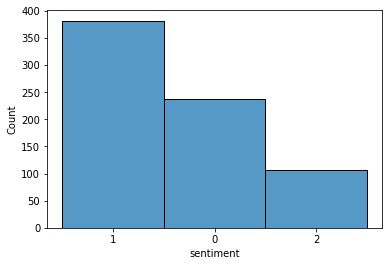

In [158]:
sns.histplot(data=train_data, x='sentiment')

## Data Processing

In [174]:
train_data['full_tweet_words_only'] = train_data['full_tweet']

In [175]:
train_data

,datetime,full_tweet,sentiment,full_tweet_words_only
0,25/3/2022 23:54,The Tennessee Bureau of Investigation has issu...,1,The Tennessee Bureau of Investigation has issu...
1,25/3/2022 23:54,The Tennessee Bureau of Investigation has issu...,1,The Tennessee Bureau of Investigation has issu...
2,25/3/2022 23:54,The Tennessee Bureau of Investigation has issu...,1,The Tennessee Bureau of Investigation has issu...
3,25/3/2022 23:54,The Tennessee Bureau of Investigation has issu...,1,The Tennessee Bureau of Investigation has issu...
4,25/3/2022 23:54,The Tennessee Bureau of Investigation has issu...,1,The Tennessee Bureau of Investigation has issu...
...,...,...,...,...
722,NaN,Seeing people complain about an amber alert is...,2,Seeing people complain about an amber alert is...
723,NaN,@lumsdominator @cbcnewsbc RCMP has nothing to ...,1,@lumsdominator @cbcnewsbc RCMP has nothing to ...
724,NaN,I would be interested to know the percentage o...,0,I would be interested to know the percentage o...
725,NaN,RCMP issue province-wide amber alert for missi...,1,RCMP issue province-wide amber alert for missi...


### Removes replies (@user), URLs (https://...) and hashtags (#hashtag), and change to lowercase

In [177]:
from pandas.core.common import temp_setattr
import re

patterns = ['http[^\s]*', '\@[A-Za-z0-9]*', '\#[A-Za-z0-9]*']

tweets_processed = []
for tweet in train_data.full_tweet_words_only:
  for pattern in patterns:
    tweet = re.sub(pattern, '', str(tweet))
  tweets_processed.append(tweet)
train_data.full_tweet_words_only = tweets_processed


train_data


,datetime,full_tweet,sentiment,full_tweet_words_only
0,25/3/2022 23:54,The Tennessee Bureau of Investigation has issu...,1,The Tennessee Bureau of Investigation has issu...
1,25/3/2022 23:54,The Tennessee Bureau of Investigation has issu...,1,The Tennessee Bureau of Investigation has issu...
2,25/3/2022 23:54,The Tennessee Bureau of Investigation has issu...,1,The Tennessee Bureau of Investigation has issu...
3,25/3/2022 23:54,The Tennessee Bureau of Investigation has issu...,1,The Tennessee Bureau of Investigation has issu...
4,25/3/2022 23:54,The Tennessee Bureau of Investigation has issu...,1,The Tennessee Bureau of Investigation has issu...
...,...,...,...,...
722,NaN,Seeing people complain about an amber alert is...,2,Seeing people complain about an amber alert is...
723,NaN,@lumsdominator @cbcnewsbc RCMP has nothing to ...,1,RCMP has nothing to do with the Alert Ready ...
724,NaN,I would be interested to know the percentage o...,0,I would be interested to know the percentage o...
725,NaN,RCMP issue province-wide amber alert for missi...,1,RCMP issue province-wide amber alert for missi...


### Removes non-alphanumeric unicode characters, including punctuations

In [184]:
import string 

train_data['full_tweet_alphanumeric'] = train_data['full_tweet_words_only']
puncts = '[' + str(string.punctuation) + ']'

tweets_alphanumeric = []
for tweet in train_data.full_tweet_alphanumeric:
  tweet = re.sub(puncts, ' ', str(tweet))
  tweet = re.sub('[^A-Za-z0-9\s]', '', str(tweet))

  tweet = tweet.lower()
  tweets_alphanumeric.append(tweet)
train_data.full_tweet_alphanumeric = tweets_alphanumeric

train_data

,datetime,full_tweet,sentiment,full_tweet_words_only,full_tweet_alphanumeric
0,25/3/2022 23:54,The Tennessee Bureau of Investigation has issu...,1,The Tennessee Bureau of Investigation has issu...,the tennessee bureau of investigation has issu...
1,25/3/2022 23:54,The Tennessee Bureau of Investigation has issu...,1,The Tennessee Bureau of Investigation has issu...,the tennessee bureau of investigation has issu...
2,25/3/2022 23:54,The Tennessee Bureau of Investigation has issu...,1,The Tennessee Bureau of Investigation has issu...,the tennessee bureau of investigation has issu...
3,25/3/2022 23:54,The Tennessee Bureau of Investigation has issu...,1,The Tennessee Bureau of Investigation has issu...,the tennessee bureau of investigation has issu...
4,25/3/2022 23:54,The Tennessee Bureau of Investigation has issu...,1,The Tennessee Bureau of Investigation has issu...,the tennessee bureau of investigation has issu...
...,...,...,...,...,...
722,NaN,Seeing people complain about an amber alert is...,2,Seeing people complain about an amber alert is...,seeing people complain about an amber alert is...
723,NaN,@lumsdominator @cbcnewsbc RCMP has nothing to ...,1,RCMP has nothing to do with the Alert Ready ...,rcmp has nothing to do with the alert ready ...
724,NaN,I would be interested to know the percentage o...,0,I would be interested to know the percentage o...,i would be interested to know the percentage o...
725,NaN,RCMP issue province-wide amber alert for missi...,1,RCMP issue province-wide amber alert for missi...,rcmp issue province wide amber alert for missi...


### Tokenize the processed tweets

In [185]:
train_data['tokens'] = train_data['full_tweet_alphanumeric'].str.split()
train_data

,datetime,full_tweet,sentiment,full_tweet_words_only,full_tweet_alphanumeric,tokens
0,25/3/2022 23:54,The Tennessee Bureau of Investigation has issu...,1,The Tennessee Bureau of Investigation has issu...,the tennessee bureau of investigation has issu...,"[the, tennessee, bureau, of, investigation, ha..."
1,25/3/2022 23:54,The Tennessee Bureau of Investigation has issu...,1,The Tennessee Bureau of Investigation has issu...,the tennessee bureau of investigation has issu...,"[the, tennessee, bureau, of, investigation, ha..."
2,25/3/2022 23:54,The Tennessee Bureau of Investigation has issu...,1,The Tennessee Bureau of Investigation has issu...,the tennessee bureau of investigation has issu...,"[the, tennessee, bureau, of, investigation, ha..."
3,25/3/2022 23:54,The Tennessee Bureau of Investigation has issu...,1,The Tennessee Bureau of Investigation has issu...,the tennessee bureau of investigation has issu...,"[the, tennessee, bureau, of, investigation, ha..."
4,25/3/2022 23:54,The Tennessee Bureau of Investigation has issu...,1,The Tennessee Bureau of Investigation has issu...,the tennessee bureau of investigation has issu...,"[the, tennessee, bureau, of, investigation, ha..."
...,...,...,...,...,...,...
722,NaN,Seeing people complain about an amber alert is...,2,Seeing people complain about an amber alert is...,seeing people complain about an amber alert is...,"[seeing, people, complain, about, an, amber, a..."
723,NaN,@lumsdominator @cbcnewsbc RCMP has nothing to ...,1,RCMP has nothing to do with the Alert Ready ...,rcmp has nothing to do with the alert ready ...,"[rcmp, has, nothing, to, do, with, the, alert,..."
724,NaN,I would be interested to know the percentage o...,0,I would be interested to know the percentage o...,i would be interested to know the percentage o...,"[i, would, be, interested, to, know, the, perc..."
725,NaN,RCMP issue province-wide amber alert for missi...,1,RCMP issue province-wide amber alert for missi...,rcmp issue province wide amber alert for missi...,"[rcmp, issue, province, wide, amber, alert, fo..."


### Remove stopwords

In [189]:
nltk.download('stopwords')
sw = stopwords.words('english')[:200]

new_tokens = []
for row in train_data['tokens']:
  new_row = []
  for item in row:
    if item not in sw:
      new_row.append(item)
  new_tokens.append(new_row)

train_data['tokens_no_sw'] = new_tokens

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [193]:
train_data

,datetime,full_tweet,sentiment,full_tweet_words_only,full_tweet_alphanumeric,tokens,tokens_no_sw
0,25/3/2022 23:54,The Tennessee Bureau of Investigation has issu...,1,The Tennessee Bureau of Investigation has issu...,the tennessee bureau of investigation has issu...,"[the, tennesse, bureau, of, investig, ha, issu...","[tenness, bureau, investig, ha, issu, amber, a..."
1,25/3/2022 23:54,The Tennessee Bureau of Investigation has issu...,1,The Tennessee Bureau of Investigation has issu...,the tennessee bureau of investigation has issu...,"[the, tennesse, bureau, of, investig, ha, issu...","[tenness, bureau, investig, ha, issu, amber, a..."
2,25/3/2022 23:54,The Tennessee Bureau of Investigation has issu...,1,The Tennessee Bureau of Investigation has issu...,the tennessee bureau of investigation has issu...,"[the, tennesse, bureau, of, investig, ha, issu...","[tenness, bureau, investig, ha, issu, amber, a..."
3,25/3/2022 23:54,The Tennessee Bureau of Investigation has issu...,1,The Tennessee Bureau of Investigation has issu...,the tennessee bureau of investigation has issu...,"[the, tennesse, bureau, of, investig, ha, issu...","[tenness, bureau, investig, ha, issu, amber, a..."
4,25/3/2022 23:54,The Tennessee Bureau of Investigation has issu...,1,The Tennessee Bureau of Investigation has issu...,the tennessee bureau of investigation has issu...,"[the, tennesse, bureau, of, investig, ha, issu...","[tenness, bureau, investig, ha, issu, amber, a..."
...,...,...,...,...,...,...,...
722,NaN,Seeing people complain about an amber alert is...,2,Seeing people complain about an amber alert is...,seeing people complain about an amber alert is...,"[see, peopl, complain, about, an, amber, alert...","[see, peopl, complain, amber, alert, selfish, ..."
723,NaN,@lumsdominator @cbcnewsbc RCMP has nothing to ...,1,RCMP has nothing to do with the Alert Ready ...,rcmp has nothing to do with the alert ready ...,"[rcmp, ha, noth, to, do, with, the, alert, rea...","[rcmp, ha, noth, alert, readi, system, like, t..."
724,NaN,I would be interested to know the percentage o...,0,I would be interested to know the percentage o...,i would be interested to know the percentage o...,"[i, would, be, interest, to, know, the, percen...","[would, interest, know, percentag, peopl, mask..."
725,NaN,RCMP issue province-wide amber alert for missi...,1,RCMP issue province-wide amber alert for missi...,rcmp issue province wide amber alert for missi...,"[rcmp, issu, provinc, wide, amber, alert, for,...","[rcmp, issu, provinc, wide, amber, alert, miss..."


### Stem the tokens

In [194]:
#### Stemming tokens ####
stemmer = PorterStemmer()
stemmed_tokens = []

for row in train_data['tokens_no_sw']:
  stemmed_row = []
  for item in row:
    token_stems = stemmer.stem(item)
    stemmed_row.append(token_stems)
  stemmed_tokens.append(stemmed_row)

train_data['tokens_stemmed'] = stemmed_tokens

In [195]:
train_data

,datetime,full_tweet,sentiment,full_tweet_words_only,full_tweet_alphanumeric,tokens,tokens_no_sw,tokens_stemmed
0,25/3/2022 23:54,The Tennessee Bureau of Investigation has issu...,1,The Tennessee Bureau of Investigation has issu...,the tennessee bureau of investigation has issu...,"[the, tennesse, bureau, of, investig, ha, issu...","[tenness, bureau, investig, ha, issu, amber, a...","[ten, bureau, investig, ha, issu, amber, alert..."
1,25/3/2022 23:54,The Tennessee Bureau of Investigation has issu...,1,The Tennessee Bureau of Investigation has issu...,the tennessee bureau of investigation has issu...,"[the, tennesse, bureau, of, investig, ha, issu...","[tenness, bureau, investig, ha, issu, amber, a...","[ten, bureau, investig, ha, issu, amber, alert..."
2,25/3/2022 23:54,The Tennessee Bureau of Investigation has issu...,1,The Tennessee Bureau of Investigation has issu...,the tennessee bureau of investigation has issu...,"[the, tennesse, bureau, of, investig, ha, issu...","[tenness, bureau, investig, ha, issu, amber, a...","[ten, bureau, investig, ha, issu, amber, alert..."
3,25/3/2022 23:54,The Tennessee Bureau of Investigation has issu...,1,The Tennessee Bureau of Investigation has issu...,the tennessee bureau of investigation has issu...,"[the, tennesse, bureau, of, investig, ha, issu...","[tenness, bureau, investig, ha, issu, amber, a...","[ten, bureau, investig, ha, issu, amber, alert..."
4,25/3/2022 23:54,The Tennessee Bureau of Investigation has issu...,1,The Tennessee Bureau of Investigation has issu...,the tennessee bureau of investigation has issu...,"[the, tennesse, bureau, of, investig, ha, issu...","[tenness, bureau, investig, ha, issu, amber, a...","[ten, bureau, investig, ha, issu, amber, alert..."
...,...,...,...,...,...,...,...,...
722,NaN,Seeing people complain about an amber alert is...,2,Seeing people complain about an amber alert is...,seeing people complain about an amber alert is...,"[see, peopl, complain, about, an, amber, alert...","[see, peopl, complain, amber, alert, selfish, ...","[see, peopl, complain, amber, alert, selfish, ..."
723,NaN,@lumsdominator @cbcnewsbc RCMP has nothing to ...,1,RCMP has nothing to do with the Alert Ready ...,rcmp has nothing to do with the alert ready ...,"[rcmp, ha, noth, to, do, with, the, alert, rea...","[rcmp, ha, noth, alert, readi, system, like, t...","[rcmp, ha, noth, alert, readi, system, like, t..."
724,NaN,I would be interested to know the percentage o...,0,I would be interested to know the percentage o...,i would be interested to know the percentage o...,"[i, would, be, interest, to, know, the, percen...","[would, interest, know, percentag, peopl, mask...","[would, interest, know, percentag, peopl, mask..."
725,NaN,RCMP issue province-wide amber alert for missi...,1,RCMP issue province-wide amber alert for missi...,rcmp issue province wide amber alert for missi...,"[rcmp, issu, provinc, wide, amber, alert, for,...","[rcmp, issu, provinc, wide, amber, alert, miss...","[rcmp, issu, provinc, wide, amber, alert, miss..."
